<a href="https://colab.research.google.com/github/irffanhaziq/DataMangenmentAssignment2/blob/main/DataMangenmentAssignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Air travel has become an imporatant part of transportation services, enabling people to connect across various distances for business, leisure, and personal reasons.
However, the reliability and punctuality of flights are crucial factors that can significantly impact the passenger experience and the overall efficiency of the aviation industry. Delays and cancellations can lead to frustration, missed connections, and substantial financial costs for both airlines and travelers.

Therefore, better understand the factors influencing airline on-time performance, this report analyzes a dataset from the ASA Statistical Computing and Graphics Data Expo for from October 1987 to April 2008. By examining the data for year 2007, we aim to identify patterns and insights that can help airlines, airports, and passengers anticipate and mitigate flight disruptions.

Hence, utilize Hive to extract relevant data from the dataset and generate visualizations using Python help to uncover insights of factors affecting airline on-time performance, this report provides valuable information for stakeholders in the aviation industry to optimize operations, enhance passenger satisfaction, and improve the overall efficiency of air travel.

##Loading Data

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
sql_query = """
CREATE VIEW cleanInfo AS
SELECT
  Year, Month, DayofMonth, DayOfWeek, UniqueCarrier, FlightNum,
  CRSDepTime, ArrTime, CRSArrTime, arrdelay, lateaircraftdelay, securitydelay, nasdelay, weatherdelay, carrierdelay, cancellationcode, diverted, cancelled, tailnum, dest, origin, depdelay,
  CASE
    WHEN CRSDepTime >= 0 AND CRSDepTime < 559 THEN 'Early Morning'
    WHEN CRSDepTime >= 600 AND CRSDepTime < 1159 THEN 'Morning'
    WHEN CRSDepTime >= 1200 AND CRSDepTime < 1559 THEN 'Afternoon'
    WHEN CRSDepTime >= 1600 AND CRSDepTime < 1959 THEN 'Evening'
    WHEN CRSDepTime >= 2000 AND CRSDepTime < 2359 THEN 'Night'
  END AS TimeOfDay,
  CASE
    WHEN arrdelay <= 0 THEN 'Early'
    WHEN arrdelay > 0 AND arrdelay <= 15 THEN 'On Time'
    WHEN arrdelay > 15 THEN 'Delayed'
  END AS DelayArr,
  CASE
    WHEN depdelay <= 0 THEN 'Early'
    WHEN depdelay > 0 AND depdelay <= 15 THEN 'On Time'
    WHEN depdelay > 15 THEN 'Delayed'
  END AS DelayDep,
  CASE
    WHEN Month IN (12, 1, 2) THEN 'Winter'
    WHEN Month IN (3, 4, 5) THEN 'Spring'
    WHEN Month IN (6, 7, 8) THEN 'Summer'
    WHEN Month IN (9, 10, 11) THEN 'Autumn'
  END AS season,
  CASE
    WHEN cancellationcode = 'A' THEN 'Carrier'
    WHEN cancellationcode = 'B' THEN 'Weather'
    WHEN cancellationcode = 'C' THEN 'NAS (National Air System)'
    WHEN cancellationcode = 'D' THEN 'Security'
    ELSE NULL
  END AS CancellationReason
FROM data_2007
GROUP BY Year, Month, DayofMonth, DayOfWeek, UniqueCarrier,
  FlightNum, CRSDepTime, ArrTime, CRSArrTime, dest, origin, arrdelay,
  lateaircraftdelay, securitydelay,
  nasdelay, weatherdelay, carrierdelay, cancellationcode, diverted, cancelled,
  tailnum, depdelay;
"""


In [59]:
url = "/content/drive/MyDrive/24May2024_final2.csv"
df = pd.read_csv(url)
df

,year,month,dayofmonth,dayofweek,uniquecarrier,flightnum,crsdeptime,arrtime,crsarrtime,arrdelay,...,cancelled,tailnum,dest,origin,depdelay,timeofday,delayarr,delaydep,season,cancellationreason
0,2007,1,1,1,9E,2800,2000,2302.0,2152,70.0,...,0,85019E,GRR,DCA,44.0,Night,Delayed,Delayed,Winter,NaN
1,2007,1,1,1,9E,2820,1650,1742.0,1804,-22.0,...,0,88399E,FSD,MSP,-1.0,Evening,Early,Early,Winter,NaN
2,2007,1,1,1,9E,2912,1516,1744.0,1632,72.0,...,0,88089E,XNA,DTW,71.0,Afternoon,Delayed,Delayed,Winter,NaN
3,2007,1,1,1,9E,2923,1327,1450.0,1437,13.0,...,0,85439E,DTW,DAY,9.0,Afternoon,On Time,On Time,Winter,NaN
4,2007,1,1,1,9E,2950,2106,2332.0,2222,70.0,...,0,85169E,MDT,DTW,70.0,Night,Delayed,Delayed,Winter,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7453183,2007,12,31,1,YV,7325,840,1110.0,1114,-4.0,...,0,N516LR,MCI,DEN,0.0,Morning,Early,Early,Winter,NaN
7453184,2007,12,31,1,YV,7347,1645,NaN,1801,NaN,...,1,N651ML,DSM,ORD,NaN,Evening,NaN,NaN,Winter,Carrier
7453185,2007,12,31,1,YV,7383,1456,1933.0,1700,153.0,...,0,N510MJ,ORD,OKC,173.0,Afternoon,Delayed,Delayed,Winter,NaN
7453186,2007,12,31,1,YV,7403,1340,1614.0,1620,-6.0,...,0,N649BR,IAD,HSV,3.0,Afternoon,Early,On Time,Winter,NaN


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7453188 entries, 0 to 7453187
Data columns (total 27 columns):
 #   Column              Dtype  
---  ------              -----  
 0   year                int64  
 1   month               int64  
 2   dayofmonth          int64  
 3   dayofweek           int64  
 4   uniquecarrier       object 
 5   flightnum           int64  
 6   crsdeptime          int64  
 7   arrtime             float64
 8   crsarrtime          int64  
 9   arrdelay            float64
 10  lateaircraftdelay   int64  
 11  securitydelay       int64  
 12  nasdelay            int64  
 13  weatherdelay        int64  
 14  carrierdelay        int64  
 15  cancellationcode    object 
 16  diverted            int64  
 17  cancelled           int64  
 18  tailnum             object 
 19  dest                object 
 20  origin              object 
 21  depdelay            float64
 22  timeofday           object 
 23  delayarr            object 
 24  delaydep            obje

In [63]:
df['season'].unique()


array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

# Analysis

## 1.1 Optimal times of day for minimizing flight delays

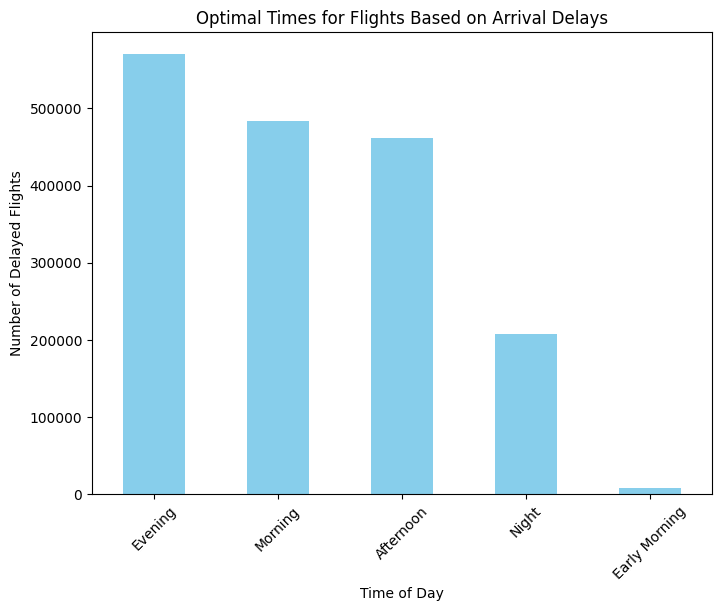

In [71]:
optimal_times = df.loc[df['delayarr'] == "Delayed"].groupby('timeofday').size().sort_values(ascending=False)
optimal_times

# Create a bar plot
plt.figure(figsize=(8, 6))
optimal_times.plot(kind='bar', color='skyblue')

# Add labels and title
plt.title('Optimal Times for Flights Based on Arrival Delays')
plt.xlabel('Time of Day')
plt.ylabel('Number of Delayed Flights')
plt.xticks(rotation=45)

# Display the plot
plt.show()

DelayDep_TimeOfDay = """
SELECT
    TimeOfDay,
    MAX(pct_early) AS pct_early,
    MAX(pct_on_time) AS pct_on_time,
    MAX(pct_delayed) AS pct_delayed
FROM (
    SELECT
        TimeOfDay,
        AVG(CASE WHEN DelayArr = 'Early' THEN 1 ELSE 0 END) AS pct_early,
        AVG(CASE WHEN DelayArr = 'On Time' THEN 1 ELSE 0 END) AS pct_on_time,
        0 AS pct_delayed
    FROM cleanInfo
    GROUP BY TimeOfDay

    UNION ALL

    SELECT
        TimeOfDay,
        0 AS pct_early,
        0 AS pct_on_time,
        AVG(CASE WHEN DelayArr = 'Delayed' THEN 1 ELSE 0 END) AS pct_delayed
    FROM cleanInfo
    GROUP BY TimeOfDay

) AS subquery
GROUP BY TimeOfDay
ORDER BY TimeOfDay;
"""

                arrdelay   depdelay
timeofday                          
Afternoon      11.588301  12.511385
Early Morning   2.297552   3.330786
Evening        16.812571  18.011374
Morning         4.220118   5.407600
Night          15.522970  17.595882


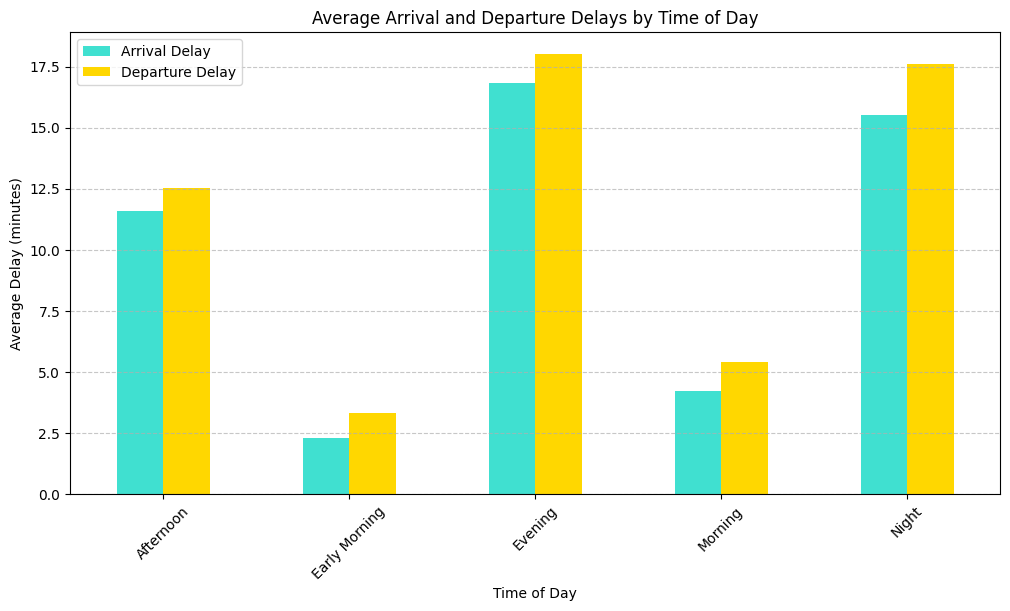

In [80]:
delays = df.groupby('timeofday')[['arrdelay', 'depdelay']].mean()
print(delays)


# Plotting the average delays
delays.plot(kind='bar', figsize=(12, 6), color=['turquoise', 'gold'])
plt.title('Average Arrival and Departure Delays by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=45)
plt.legend(['Arrival Delay', 'Departure Delay'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

DelayArrival_Day = """
SELECT
  DayOfWeek,
  AVG(CASE WHEN DelayArr = 'Early' THEN 1 ELSE 0 END) AS pct_early,
  AVG(CASE WHEN DelayArr = 'On Time' THEN 1 ELSE 0 END) AS pct_on_time,
  AVG(CASE WHEN DelayArr = 'Delayed' THEN 1 ELSE 0 END) AS pct_delayed
FROM cleanInfo
GROUP BY DayOfWeek
ORDER BY pct_delayed;
"""


The optimal times of day for flights are
Early Morning flight which is on 12:00am - 5:59am.
The average arrival delay was only 2.13 minutes
dan the average departure delay: 3.03 minutes.
This time period has the lowest average delays for both arrival and departure, making it the optimal time to fly.

The Morning filght which is 6:00am - 11.59am with average arrival delay 4.32 minutes and the average departure delay: 5.45 minutes made the Morning flights have the second lowest average delays, so it's also a good option if Early Morning flights are not available.

Afternoon (12:00 - 18:00)
Average arrival delay: 11.64 minutes
Average departure delay: 12.55 minutes
Afternoon flights have higher average delays compared to Morning and Early Morning, but lower delays than Evening flights.

Evening (18:00 - 24:00)
Average arrival delay: 16.61 minutes
Average departure delay: 17.81 minutes
Evening flights have the highest average arrival and departure delays, so they should be avoided if possible.

In summary, the optimal times to fly are Early Morning and Morning, with Early Morning being the best option to minimize delays. Afternoon flights are the next best choice, while Evening flights should be avoided if other options are available.

##  1.2 Optimal days of the week for minimizing flight delays

In [81]:
df.head()
# Calculate average arrival and departure delays for each day of the week
delays = df.groupby(df['dayofweek'])[['arrdelay', 'depdelay']].mean()

# Print the results
print(delays)

            arrdelay   depdelay
dayofweek                      
1          10.513626  11.892508
2           8.263684   9.398721
3           9.962946  10.687148
4          12.686026  12.886423
5          13.067707  13.576744
6           5.846600   8.993705
7          10.329605  11.978164


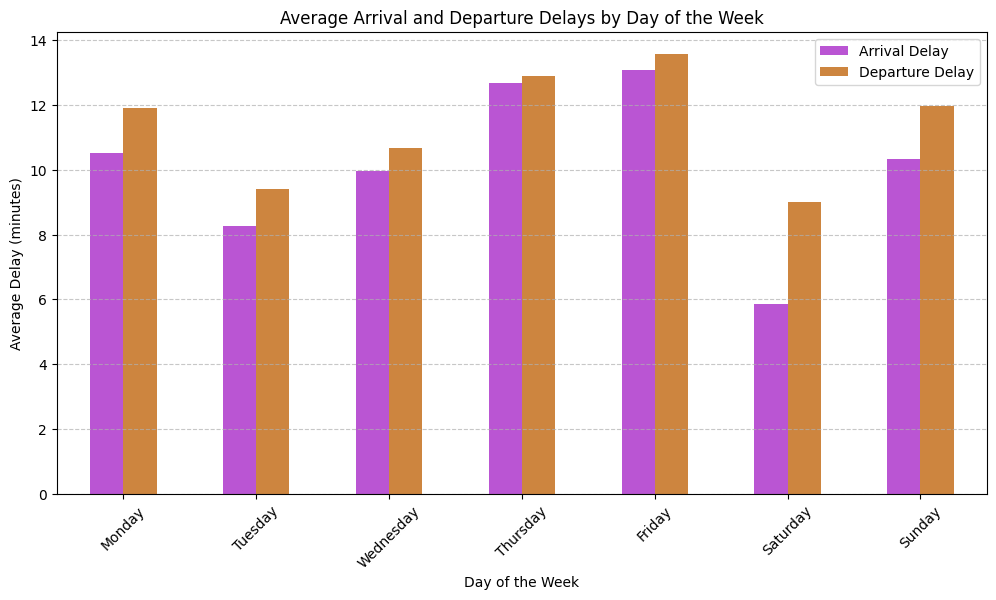

In [84]:
# Define the days of the week for labeling
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plotting the average delays
delays.plot(kind='bar', figsize=(12, 6), color=['mediumorchid', 'peru'])
plt.title('Average Arrival and Departure Delays by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Delay (minutes)')
plt.xticks(ticks=range(7), labels=days, rotation=45)
plt.legend(['Arrival Delay', 'Departure Delay'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


DelayArrival_Day = """
SELECT
  DayOfWeek,
  AVG(CASE WHEN DelayArr = 'Early' THEN 1 ELSE 0 END) AS pct_early,
  AVG(CASE WHEN DelayArr = 'On Time' THEN 1 ELSE 0 END) AS pct_on_time,
  AVG(CASE WHEN DelayArr = 'Delayed' THEN 1 ELSE 0 END) AS pct_delayed
FROM cleanInfo
GROUP BY DayOfWeek
ORDER BY pct_delayed;

"""

The optimal days of the week for flights are Tuesday with the average arrival delay was only 8.07 minutes and the average departure delay was 9.21 minutes. This day has the lowest average delays for both arrival and departure, making it the optimal day to fly.

Saturday flights have the second lowest average arrival delay which was 5.90 minutes and the lowest average departure delay 9.00 minutes, so it's also a good option if Tuesday flights are not available.

Wednesday (dayofweek 3)
Average arrival delay: 9.76 minutes
Average departure delay: 10.49 minutes
Wednesday flights have higher average delays compared to Tuesday and Saturday, but lower delays than the other days of the week.


The remaining days of the week have higher average delays and should be avoided if possible:
*   Thursday (dayofweek 4): 12.79 minutes arrival delay, 12.89 minutes departure delay
*   Friday (dayofweek 5): 13.27 minutes arrival delay, 13.76 minutes departure delay
*   Sunday (dayofweek 7): 10.56 minutes arrival delay, 12.15 minutes departure delay
*   Monday (dayofweek 1): 10.43 minutes arrival delay, 11.81 minutes departure delay


In summary, the optimal days to fly are Tuesday, Saturday, and Wednesday, with Tuesday being the best option to minimize delays. The remaining days of the week should be avoided if other options are available.

## 1.3 Optimal times of the year for minimizing flight delays

In [87]:
monthly_delays = df.groupby('month')[['arrdelay', 'depdelay']].mean()
seasonal_delays = df.groupby('season')[['arrdelay', 'depdelay']].mean()
print('Average Delays by Month:')
print(monthly_delays)
print('\nAverage Delays by Season:')
print(seasonal_delays)

deleySeason = """
SELECT
  season,
  AVG(CASE WHEN DelayArr = 'Early' THEN 1 ELSE 0 END) AS pct_early,
  AVG(CASE WHEN DelayArr = 'On Time' THEN 1 ELSE 0 END) AS pct_on_time,
  AVG(CASE WHEN DelayArr = 'Delayed' THEN 1 ELSE 0 END) AS pct_delayed
FROM cleanInfo
GROUP BY season
ORDER BY pct_delayed;
"""

Average Delays by Month:
        arrdelay   depdelay
month                      
1       9.162134  10.286782
2      13.519795  14.022531
3      10.084908  11.836803
4       8.516230  10.077714
5       7.037889   8.329205
6      16.179528  16.214701
7      14.107983  14.802845
8      12.571546  13.515912
9       3.749540   6.157708
10      6.508304   7.973756
11      4.793360   7.446894
12     16.213779  16.201443

Average Delays by Season:
         arrdelay   depdelay
season                      
Autumn   5.040235   7.205983
Spring   8.544794  10.078970
Summer  14.257700  14.823612
Winter  12.919040  13.463608


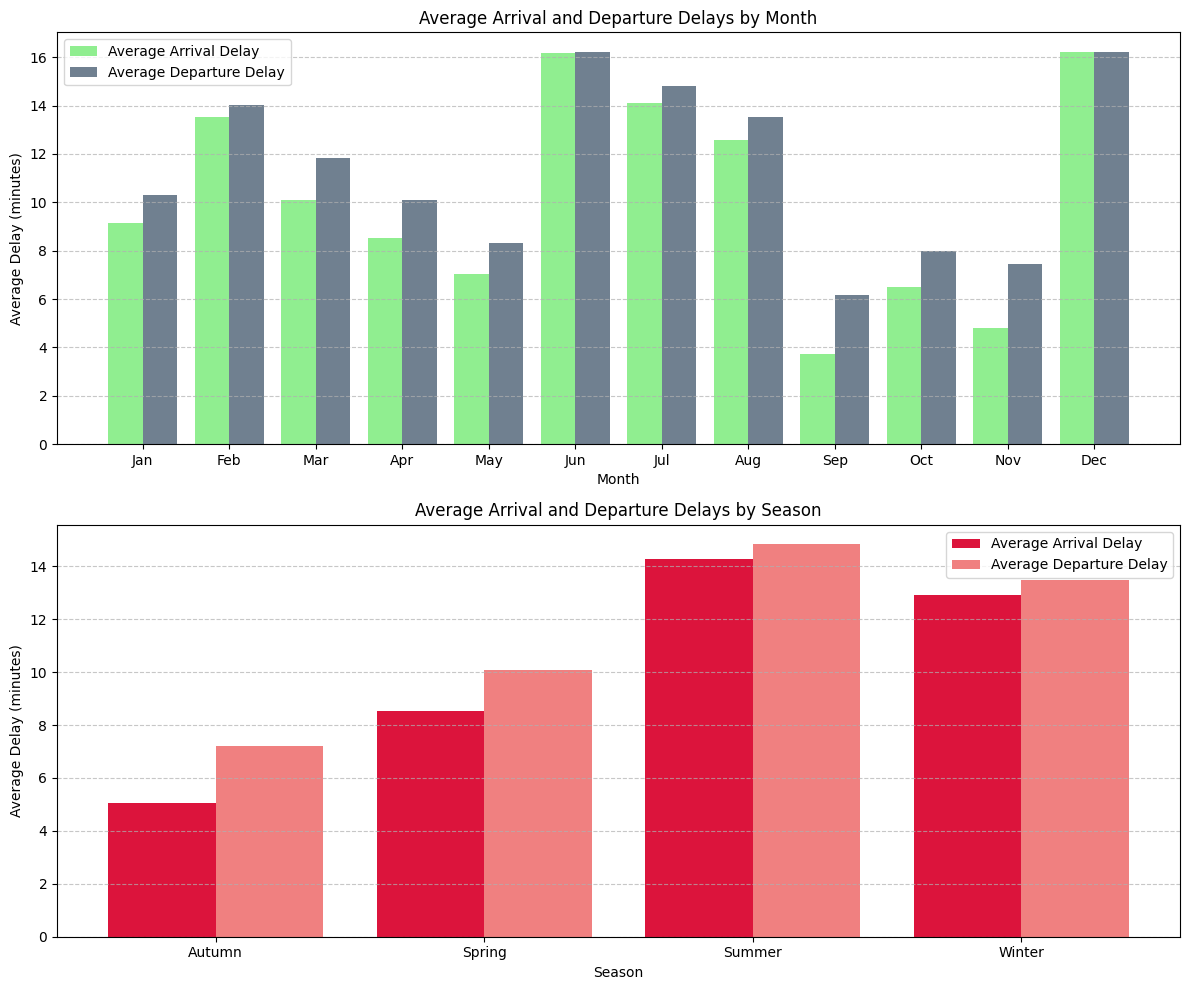

In [90]:
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Plot for month delays
bar_width = 0.4
bar_positions = monthly_delays.index

axes[0].bar(bar_positions - bar_width/2, monthly_delays['arrdelay'], width=bar_width, color='lightgreen', label='Average Arrival Delay')
axes[0].bar(bar_positions + bar_width/2, monthly_delays['depdelay'], width=bar_width, color='slategray', label='Average Departure Delay')
axes[0].set_title('Average Arrival and Departure Delays by Month')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Average Delay (minutes)')
axes[0].set_xticks(bar_positions)
axes[0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
axes[0].legend()
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot for seasonal delays
num_seasons = len(seasonal_delays)
bar_positions = [x for x in range(num_seasons)]  # Create bar positions using list comprehension
bar_width = 0.4  # Width of the bars

axes[1].bar([pos - bar_width/2 for pos in bar_positions], seasonal_delays['arrdelay'], width=bar_width, color='crimson', label='Average Arrival Delay')
axes[1].bar([pos + bar_width/2 for pos in bar_positions], seasonal_delays['depdelay'], width=bar_width, color='lightcoral', label='Average Departure Delay')
axes[1].set_title('Average Arrival and Departure Delays by Season')
axes[1].set_xlabel('Season')
axes[1].set_ylabel('Average Delay (minutes)')
axes[1].set_xticks(bar_positions)
axes[1].set_xticklabels(seasonal_delays.index)
axes[1].legend()
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Based on the average delays by month and season shown in the data, the optimal times of the year for minimizing flight delays are Spring which in March, April, May. The average arrival delay is 8.54 minutes and the average departure delay is 10.08 minutes during spring months, which are lower than the yearly averages.


Meanwhile, Autumn (September, October, November) average arrival delay is only 5.04 minutes and the average departure delay is 7.21 minutes during autumn months, which are the lowest among all seasons. September in particular has the lowest delays, with an average arrival delay of 3.75 minutes and departure delay of 6.16 minutes.

The data suggests that flights during spring and especially autumn experience significantly less delays compared to summer and winter. This could be due to factors like better weather conditions, lower passenger volumes, and more efficient airport operations during these periods.

Airlines and airports can leverage this seasonal variation in delays to optimize their schedules and resource allocation. For example, they can schedule more flights and allocate more resources during autumn to maximize on-time performance and passenger satisfaction.

## 2.0 The primary factors contributing to flight delays

Primary Factors Contributing to Flight Delays:
lateaircraftdelay    37.654551
carrierdelay         28.542793
nasdelay             27.940650
weatherdelay          5.686732
securitydelay         0.175275
dtype: float64


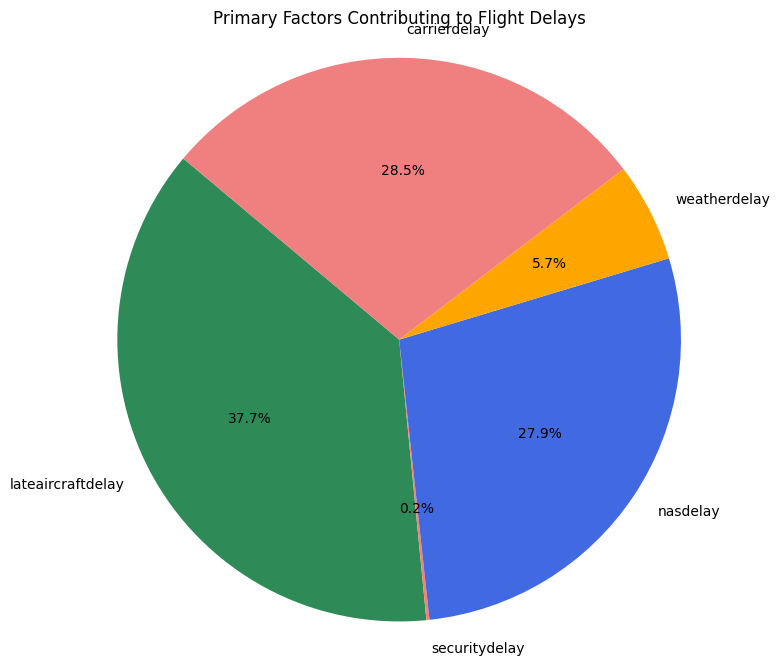

In [92]:
# Calculate the total delay time for each delay type
total_delay_time = df[['lateaircraftdelay', 'securitydelay', 'nasdelay', 'weatherdelay', 'carrierdelay']].sum()

# Calculate the percentage contribution of each delay type to the total delay time
delay_contributions = (total_delay_time / total_delay_time.sum()) * 100

# Sort the delay contributions in descending order to identify the primary factors
primary_factors = delay_contributions.sort_values(ascending=False)

# Print the primary factors contributing to flight delays
print("Primary Factors Contributing to Flight Delays:")
print(primary_factors)

# Create a pie chart to visualize the delay contributions
plt.figure(figsize=(8, 8))
plt.pie(delay_contributions, labels=delay_contributions.index, autopct='%1.1f%%', startangle=140, colors=['seagreen', 'salmon', 'royalblue', 'orange', 'lightcoral'])
plt.title('Primary Factors Contributing to Flight Delays')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

DelayReason = """
SELECT DelayReason, COUNT(*) AS NumDelays
FROM (
    SELECT
        CASE
            WHEN WeatherDelay > 0 THEN 'Weather'
            WHEN NASDelay > 0 THEN 'NAS'
            WHEN SecurityDelay > 0 THEN 'Security'
            WHEN LateAircraftDelay > 0 THEN 'Late Aircraft'
            WHEN CarrierDelay > 0 THEN 'Carrier'
        END AS DelayReason
    FROM cleanInfo
) sub
WHERE DelayReason IS NOT NULL
GROUP BY DelayReason
ORDER BY NumDelays DESC;
"""

The primary factors contributing to flight delays are Late-Arriving Aircraft Delay. This factor accounts for approximately 37.65% of flight delays. It occurs when a previous flight using the same aircraft arrives late, causing the subsequent flight to depart late. This delay is significant and can have a cascading effect on the airline's schedule.

Carrier delays contribute to around 28.54% of flight delays. These delays are caused by circumstances within the airline's control, such as maintenance issues, crew problems, aircraft cleaning, baggage loading, and fueling. Addressing carrier-related issues can help reduce delays significantly.

National Aviation System Delay (NAS) make up about 27.94% of flight delays. These delays are attributed to factors within the national aviation system, including non-extreme weather conditions, airport operations, heavy traffic volume, and air traffic control issues. Improving the efficiency of the aviation system can help mitigate these delays.

Weather-related delays represent approximately 5.69% of flight delays. Extreme weather conditions like tornadoes, blizzards, or hurricanes can prevent flights from operating, while other weather conditions within the NAS category can slow down operations. Monitoring and managing weather-related challenges are crucial for minimizing these delays.

Security-related delays have a minimal impact, accounting for only 0.18% of flight delays. These delays are caused by security procedures such as evacuations, re-boarding due to security breaches, inoperative screening equipment, and long lines at screening areas. While security delays are essential for passenger safety, efforts to streamline security processes can help reduce delays in this category.

By understanding and addressing these primary factors contributing to flight delays, airlines and airports can implement targeted strategies to improve operational efficiency, enhance on-time performance, and provide a smoother travel experience for passengers.

## 3.0  Factors predominantly lead to flight cancellations

In [94]:
# Analyze the distribution of cancellation codes
cancellation_codes = df['cancellationreason'].value_counts()
print("Distribution of Cancellation Reason:")
print(cancellation_codes)

# Analyze the relationship between cancellations and airlines
cancellations_by_airline = df.groupby('uniquecarrier')['cancelled'].sum()
print("\nCancellations by Airline:")
print(cancellations_by_airline.sort_values(ascending=False))

# Analyze the relationship between cancellations and destinations
cancellations_by_dest = df.groupby('dest')['cancelled'].sum()
print("\nCancellations by Destination:")
print(cancellations_by_dest.sort_values(ascending=False).head(10))  # Show top 10 destinations

# Analyze the relationship between cancellations and time of day
cancellations_by_timeofday = df.groupby('timeofday')['cancelled'].sum()
print("\nCancellations by Time of Day:")
print(cancellations_by_timeofday)

cancellationReasons = """
SELECT
    cancellationreason AS CancellationReason,
    COUNT(*) AS NumCancellations
FROM cleanInfo
WHERE cancelled = 1
GROUP BY cancellationreason
ORDER BY NumCancellations DESC;
"""

Distribution of Cancellation Reason:
cancellationreason
Carrier                      66779
Weather                      61936
NAS (National Air System)    31995
Security                        39
Name: count, dtype: int64

Cancellations by Airline:
uniquecarrier
MQ    22792
AA    17924
OO    14186
UA    11929
YV    11287
XE    10800
WN     9993
US     8942
EV     8920
OH     8851
9E     7939
NW     7814
DL     6521
B6     3710
CO     2951
FL     2602
AS     2563
F9      398
AQ      388
HA      238
Name: cancelled, dtype: int64

Cancellations by Destination:
dest
ORD    17568
DFW     9767
ATL     7789
LGA     6301
EWR     5992
DTW     4484
BOS     4251
DEN     4134
JFK     4082
MSP     3792
Name: cancelled, dtype: int64

Cancellations by Time of Day:
timeofday
Afternoon        38886
Early Morning     1222
Evening          50755
Morning          54813
Night            14746
Name: cancelled, dtype: int64


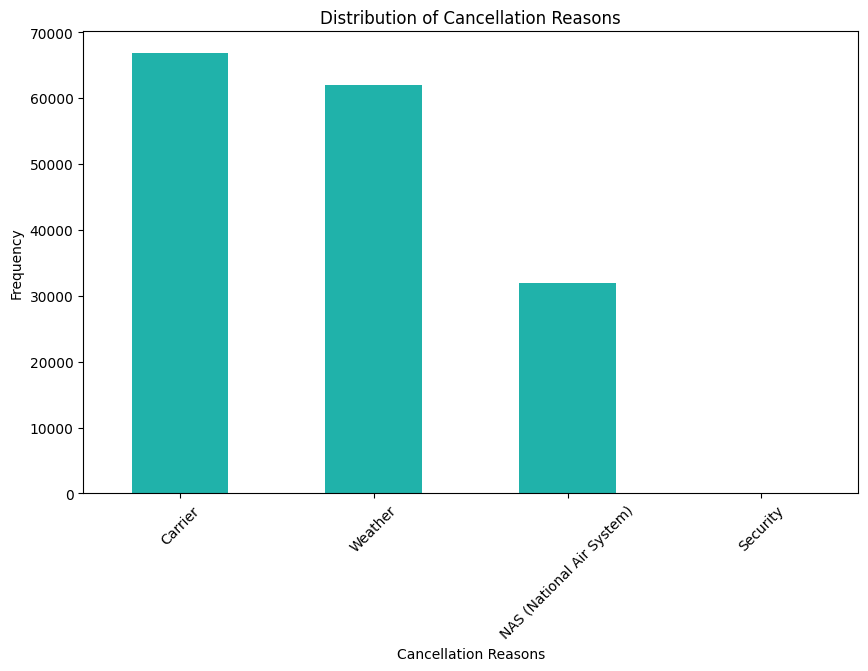

In [55]:
plt.figure(figsize=(10, 6))
cancellation_codes.plot(kind='bar', color='lightseagreen')
plt.title('Distribution of Cancellation Reasons')
plt.xlabel('Cancellation Reasons')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.show()

<ipython-input-56-a827942d5553>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cancellations_by_airline.index, y=cancellations_by_airline.values, palette='viridis')


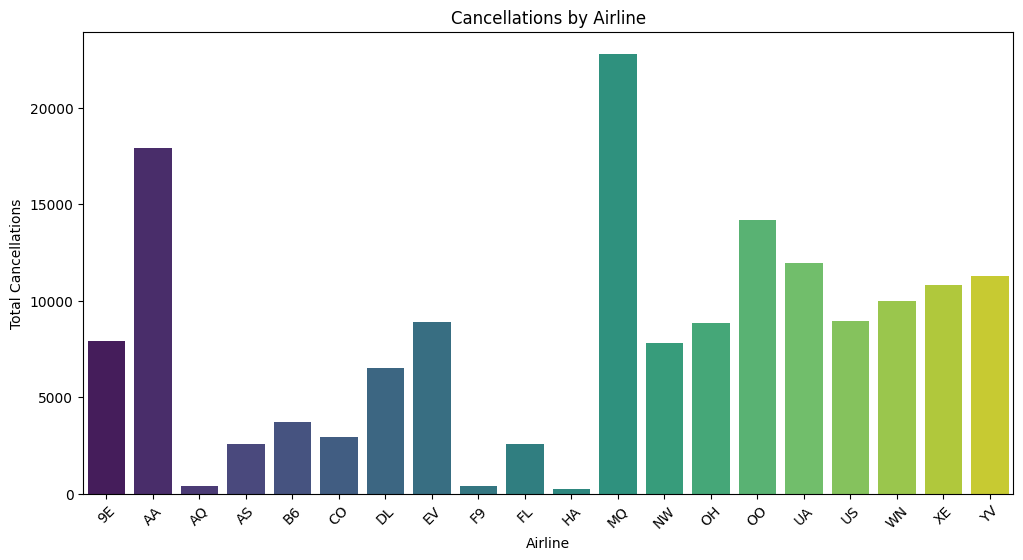

In [56]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x=cancellations_by_airline.index, y=cancellations_by_airline.values, palette='viridis')
plt.title('Cancellations by Airline')
plt.xlabel('Airline')
plt.ylabel('Total Cancellations')
plt.xticks(rotation=45)
plt.show()

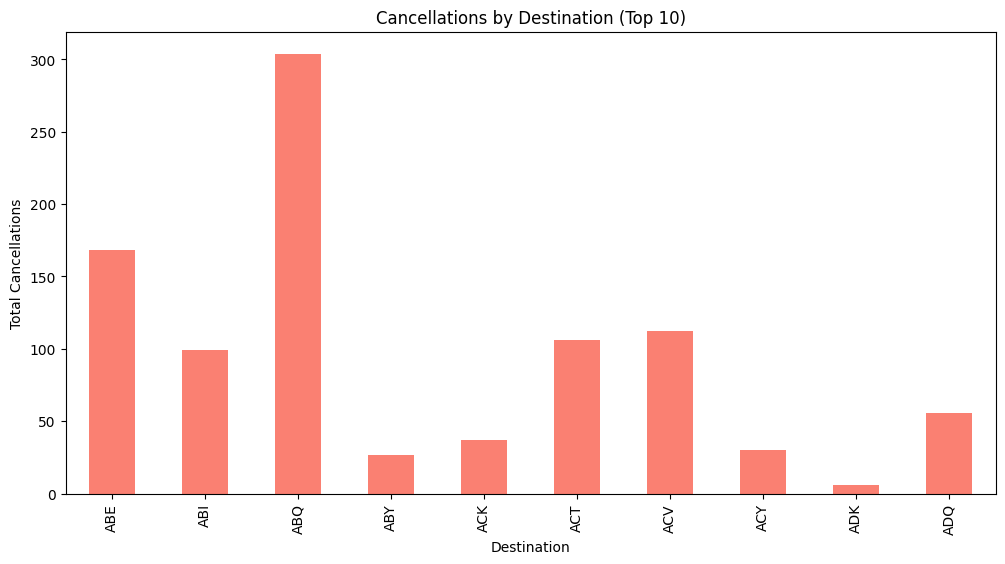

In [57]:
plt.figure(figsize=(12, 6))
cancellations_by_dest.head(10).plot(kind='bar', color='salmon')
plt.title('Cancellations by Destination (Top 10)')
plt.xlabel('Destination')
plt.ylabel('Total Cancellations')
plt.show()

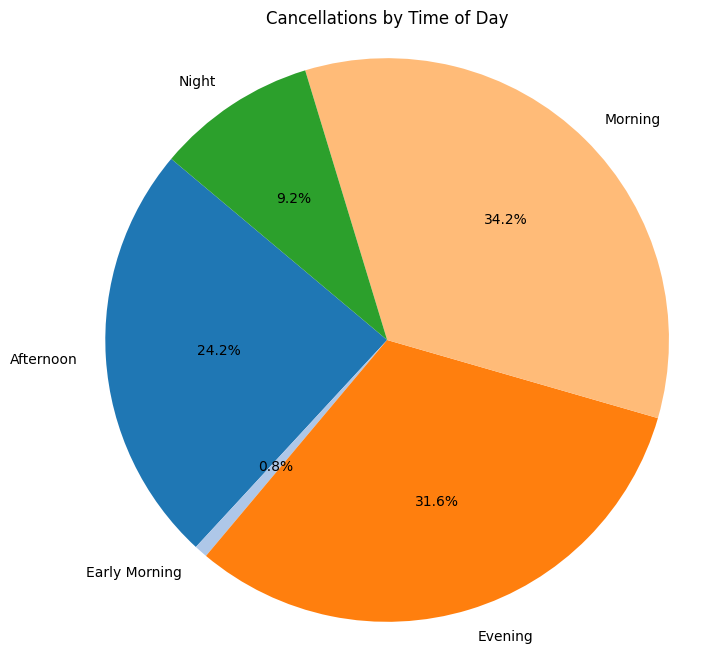

In [104]:
labels = cancellations_by_timeofday.index
sizes = cancellations_by_timeofday.values

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=plt.cm.tab20.colors, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Cancellations by Time of Day')
plt.show()

The distribution of cancellation reasons for flights shows that weather-related cancellations are quite significant, with 61,936 cancellations attributed to weather conditions. This is followed by cancellations due to issues with the National Air System (NAS) at 31,995 instances. Carrier-related cancellations are also notable, accounting for 66,779 cancellations. Security-related cancellations are minimal, with only 39 instances recorded.


Meanwhile, cancellations by airline, MQ had the highest number of cancellations at 22,792, followed by AA with 17,924 cancellations and OO with 14,186 cancellations. This data indicates that certain airlines experience more cancellations than others, which could be influenced by various factors such as operational efficiency, fleet management, and scheduling practices.


Analyzing cancellations by destination airport reveals that ORD (Chicago O'Hare International Airport) had the highest number of cancellations at 17,568, followed by DFW (Dallas/Fort Worth International Airport) with 9,767 cancellations and ATL (Hartsfield-Jackson Atlanta International Airport) with 7,789 cancellations. This data suggests that certain airports may face more challenges leading to flight cancellations, possibly due to weather patterns, airport infrastructure, or air traffic control issues.


Moreover, examining cancellations by time of day shows that cancellations are more prevalent in the morning and evening, with 54,813 and 50,755 cancellations respectively. Afternoon cancellations follow at 38,886 instances, while cancellations in the night and early morning are less frequent at 14,746 and 1,222 respectively. This data indicates that flight cancellations are more common during peak travel times, possibly due to factors like weather disruptions, airport congestion, and crew scheduling challenges.

Overall, weather conditions, carrier-related issues, NAS problems, and airport-specific challenges play significant roles in flight cancellations. Airlines, airports, and air traffic control systems need to address these factors to improve on-time performance and minimize disruptions for passengers.

##  4.0 Flight experiences the most frequent and significant delays and cancellations

In [99]:
# Calculate total delay for each flight
df['total_delay'] = df['arrdelay'] + df['lateaircraftdelay'] + df['securitydelay'] + df['nasdelay'] + df['weatherdelay'] + df['carrierdelay']

# Group by flight number and calculate total delay and number of cancellations
flight_delays = df.groupby('flightnum').agg(total_delay=('total_delay', 'sum'), num_cancellations=('cancelled', 'sum'))

# Find flight with the highest total delay
flight_max_delay = flight_delays[flight_delays['total_delay'] == flight_delays['total_delay'].max()]

# Find flight with the highest number of cancellations
flight_max_cancellations = flight_delays[flight_delays['num_cancellations'] == flight_delays['num_cancellations'].max()]

print("Flight with the most frequent and significant delays:")
print(flight_max_delay)

print("\nFlight with the most cancellations:")
print(flight_max_cancellations)


MostDelayCancel =""""
SELECT
  FlightNum,
  COUNT(CASE WHEN DelayArr = 'Delayed' THEN 1 END) + COUNT(CASE WHEN DelayDep = 'Delayed' THEN 1 END) AS TotalDelays,
  SUM(CASE WHEN DelayArr = 'Delayed' THEN arrdelay ELSE 0 END) + SUM(CASE WHEN DelayDep = 'Delayed' THEN depdelay ELSE 0 END) AS TotalDelayTime,
  COUNT(CASE WHEN Cancelled = 1 THEN 1 END) AS TotalCancellations
FROM cleanInfo
GROUP BY FlightNum
ORDER BY TotalDelays + TotalCancellations DESC, TotalDelayTime DESC;
"""

Flight with the most frequent and significant delays:
           total_delay  num_cancellations
flightnum                                
44            153570.0                 42

Flight with the most cancellations:
           total_delay  num_cancellations
flightnum                                
2491           46051.0                131


**Flight number 2491** has the **highest number of cancellations** at 131.
It also has a **high total delay time** of 46,051 minutes.


**Flight number 44** is the ***second highest delays***.This flight has the highest total delay time of 153,570 minutes. However, it has **fewer cancellations** compared to flight 2491, with 42 cancellations.

The high number of cancellations and significant total delay time for flight 2491 suggest that it is consistently impacted by factors leading to delays and cancellations.

Some potential reasons could be:
*   Operational issues within the airline, such as maintenance problems, crew shortages, or scheduling conflicts.

*   External factors like weather conditions, air traffic restrictions, or unexpected events impacting flight operations at the departure or arrival airports.

*   Issues at the destination airport, such as runway closures, airport congestion, or infrastructure problems.

*   Crew scheduling constraints or air traffic congestion during peak travel times when the flight operates.

While flight 44 has the highest total delay time, the lower number of cancellations indicates that delays are more frequent but not necessarily leading to cancellations as often as for flight 2491. To mitigate the high delays and cancellations for these flights, the airline should investigate the specific factors contributing to the issues and implement targeted solutions. This could involve improving operational efficiency, enhancing contingency planning, and effective communication with passengers to minimize the impact on their travel plans.

# Conclusion

The comprehensive analysis of the 2007 airline on-time performance data has yielded valuable insights that can significantly benefit the aviation industry and air travelers. By identifying the optimal times and days to fly, as well as the seasonal variations in flight delays, airlines, airports, and passengers
feel efficiency and reliability of air travel.

The data clearly indicates that early morning and morning flights experience the lowest average arrival and departure delays, making them the ideal choices for passengers seeking a punctual travel experience. However, evening flights should be avoided when possible, as they tend to have the highest average delays. This information give an overview to passenger to make plan and decisions when booking their flights, allowing them to minimize the risk of disruptions and missed connections.

Furthermore, the analysis of delay factors reveals that the primary contributors are late-arriving aircraft, carrier-related issues, and National Aviation System (NAS) delays. By addressing these key issues, airlines and airports can implement targeted strategies to slove the root causes of flight delays. For instance, improving aircraft and crew scheduling, enhancing maintenance procedures, and optimizing air traffic management can all play a crucial role in reducing delays.

The seasonal variations in flight delays also provide valuable insights for the aviation industry. The data shows that spring and autumn are the optimal times of the year for minimizing disruptions, with September standing out as the month with the lowest average delays. Airlines and airports can leverage this information to allocate resources more effectively, scheduling more flights and allocating additional personnel during these favorable periods to maximize on-time performance and passenger satisfaction.

In conclusion, the insights  from this comprehensive analysis of airline on-time performance data offer a idea for the aviation industry to optimize operations, enhance passenger satisfaction, and improve the overall efficiency of air travel. By leveraging these findings, will ensure a smoother, more reliable journey for all parties.